# Jupyter Notebook for Demo

In [101]:
import random
import math
import numpy as np
import matplotlib.pyplot as plt

## Smartphone Performance Degradation (No repairing)

In [102]:
def degrade_performance(time_held, performance=1.0, decay_rate=0.0005):
    """
    Simulate the degradation of performance over time using an exponential decay model with Gaussian noise.
    """
    # Calculate the exponential decay
    decay_factor = math.exp(-decay_rate * time_held)
    performance = max(0, performance * decay_factor)
    # Add Gaussian noise to the performance
    noise = random.gauss(0, decay_rate)  # Mean of 0, standard deviation of 0.02
    performance = max(0, min(1, performance + noise))  # Ensure performance stays between 0 and 1
    # Update the status if the phone reaches a critical performance level or by random chance
    return performance

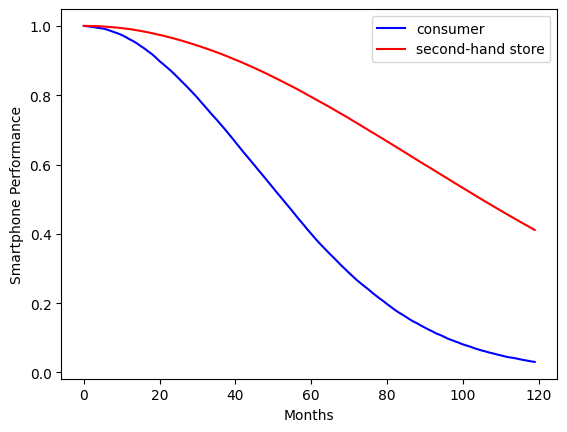

In [103]:
perf = 1.0
performance_sec = 1.0
months = 120
rec_price_list = [perf]
degraded_perf_sec = [perf]
for t in range(1, months):
    perf = degrade_performance(t, perf, decay_rate=0.0005)
    rec_price_list.append(perf)
    performance_sec = degrade_performance(t, performance_sec, decay_rate=0.0005/4)
    degraded_perf_sec.append(performance_sec)

plt.plot(rec_price_list, 'b-', label='consumer')
plt.plot(degraded_perf_sec, 'r-', label='second-hand store')
plt.ylabel('Smartphone Performance')
plt.xlabel('Months')
plt.legend()
plt.show()

## Smartphone Repairing function

In [104]:
def repair_product(repair_times, performance, time_held):
    repair_effectiveness = max(0.1, 1 - (repair_times * 0.05) - (time_held * 0.001))
    repair_success = random.random()
    if repair_success < repair_effectiveness:
        performance_increase = 0.2 * (1 - performance) 
        performance = min(1.0, performance + performance_increase)
    return performance

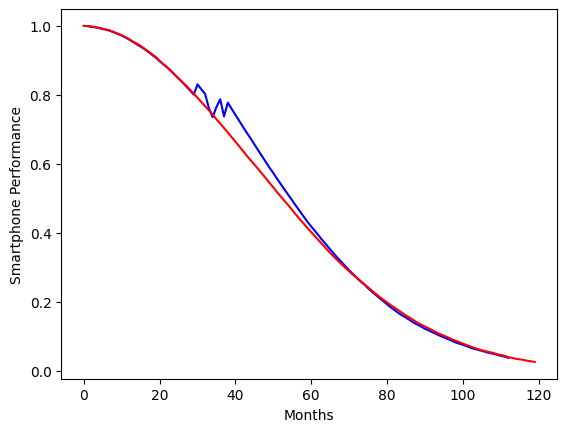

In [105]:
perf = 1.0
repair_times = 0
months = 120
rec_price_list = [1.0]

repair_max_times = 6
repair_att = float(np.random.normal(0.5, 0.05))

for t in range(1, months):
    perf = degrade_performance(t, perf)
    if 0.4 <= perf <= 0.8 and repair_times <= repair_max_times :
        if random.random() <= repair_att:
            perf = repair_product(repair_times, perf, time_held=t)
            rec_price_list.append(perf)
            repair_times += 1
    else:
        rec_price_list.append(perf)

o_perf = 1.0
degraded_perf = [1.0]
for t in range(1, months):
    o_perf = degrade_performance(t, o_perf)
    degraded_perf.append(o_perf)
    
plt.plot(rec_price_list, 'b-')
plt.plot(degraded_perf, 'r-')
plt.ylabel('Smartphone Performance')
plt.xlabel('Months')
plt.show()

In [106]:
def calculate_recycle_price(purchase_price, time_held, performance):
    disc = np.random.normal(0.45, 0.05)
    recycle_price = disc * (0.3 * performance + 0.05 / (48 + time_held)) * purchase_price
    recycle_price = max(recycle_price, 50)
    return recycle_price

In [107]:
def calculate_repair_cost(purchase_price, time_held, performance, warranty_duration=12):
    if time_held <= warranty_duration:  # Phone is under warranty
        repair_cost = 0  # Free repair under warranty (or set to a very low cost)
    else:
        repair_cost = (1 - performance) / (0.02 + 2 / time_held) * purchase_price / 120
    return repair_cost

In [108]:
demand_used = random.uniform(0, 0.2) # demand of use for each smartphone

def calculate_resell_price_sechnd(purchase_price, time_held, performance, repair_cost):
    normalized_repair_cost = repair_cost / purchase_price
    buying_price = purchase_price * performance * (1 - normalized_repair_cost) * (0.475 + 2 / (time_held + 8)) * 0.9
    # buying_price = int(min(0.8 * purchase_price, buying_price))
    return buying_price

In [109]:
def calculate_sechnd_market_price(purchase_price, time_held, performance, repair_cost):
    normalized_repair_cost = repair_cost / purchase_price
    selling_price = purchase_price * performance * (1 + normalized_repair_cost) * (0.475 + 2 / (time_held + 8)) * 1.1
    #self.secondhand_market_price = int(min(0.98 * self.purchase_price, selling_price))
    # print(f'{self.model.steps},new {self.purchase_price}, used {self.secondhand_market_price}')
    return selling_price

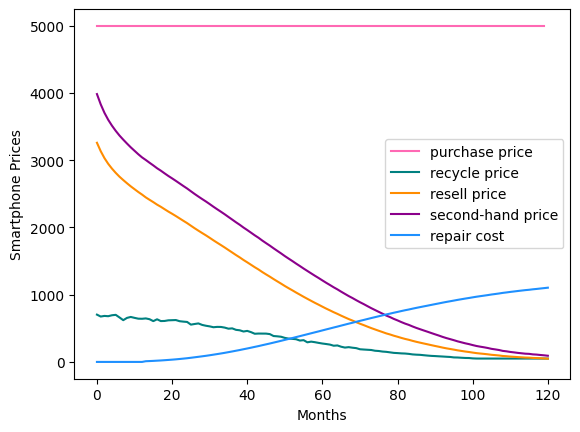

In [110]:
perf = 1.0
months = 120

price = 4999
purchase_prices = [price] * months
rec_price_list = []
repair_costs = []
resell_prices = []
sechnd_prices = []

for t in range(0, months + 1):
    perf = degrade_performance(t, perf)
    
    c_rep = calculate_repair_cost(price, t, perf)
    p_rec = calculate_recycle_price(price, t, perf)
    p_res = calculate_resell_price_sechnd(price, t, perf, c_rep)
    p_sec = calculate_sechnd_market_price(price, t, perf, c_rep)
    
    rec_price_list.append(p_rec)
    repair_costs.append(c_rep)
    resell_prices.append(p_res)
    sechnd_prices.append(p_sec)

plt.plot(purchase_prices, color='#FF69B4', linestyle='-', label='purchase price')
plt.plot(rec_price_list, color='#008080', linestyle='-', label='recycle price')
plt.plot(resell_prices, color='#FF8C00', linestyle='-', label='resell price')
plt.plot(sechnd_prices, color='#8B008B', linestyle='-', label='second-hand price')
plt.plot(repair_costs, color='#1E90FF', linestyle='-', label='repair cost')

plt.ylabel('Smartphone Prices')
plt.xlabel('Months')
plt.legend()
plt.show()